<a href="https://colab.research.google.com/github/utkarshs75/PlayStore-Data-Analysis/blob/main/Play_Store_App_review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path1 = '/content/drive/MyDrive/AB_Capstone/Play Store Data.csv'
path2 = '/content/drive/MyDrive/AB_Capstone/User Reviews.csv'
data = pd.read_csv(path1)
rev = pd.read_csv(path2)

In [5]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [9]:
installs = [i for i in data['Installs']]

def clean_installs(installs_list):
    clean_installs = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',','')
        if '+' in install:
            install = install.replace('+','')
        if 'Free' in install:
            install = install.replace('Free','0')
        #install = int(install)
        clean_installs.append(install)
    return clean_installs


data['Installs'] = clean_installs(installs)
data['Installs'] = data['Installs'].astype(float)
data['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [10]:
review = [i for i in data['Reviews']]

def clean_review(rev_list):
  clean = []
  for rev in rev_list:
    if 'M' in rev:
      rev = rev.replace('M','')
      clean.append(float(rev))
    else:
      clean.append(float(rev))
  return clean

data['Reviews'] = clean_review(review)
data['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [57]:
x=[i for i in data['Size']]
#print(x)
x.count('Varies with device')

0

In [12]:
index =  data[data['Size'] == '1,000+'].index
data.drop(axis = 0, inplace=True, index = index)

size = [i for i in data['Size']]

def clean_size(size_list):
  clean = []
  for i in size_list:
    if 'M' in i:
      i = i.replace('M','')
      clean.append(float(i))
    elif 'k' in i:
      i = i.replace('k','')
      clean.append(float(i)/1024)
    elif 'Varies with device' in i:
      i = i.replace('Varies with device','0')
      clean.append(float(i))
    else:
      clean.append(float(i))
  return clean

data['Size'] = clean_size(size)
data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [13]:
#data.loc[data['Size']==0.0,'Size'] = np.nan
#data['Size']

In [14]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [15]:
price = [i for i in data['Price']]

def clean_price(prices):
  clean = []
  for i in prices:
    if '$' in i:
      i = i.replace('$','')
      clean.append(float(i))
    else:
      clean.append(float(i))
  return clean

data['Price'] = clean_price(price)
data['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [17]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [18]:
# replcing with medians in Ratings
def replace_vals(missing_vals):

    return missing_vals.fillna(missing_vals.median())

data['Rating'] = data['Rating'].transform(replace_vals)
data['Rating'] = data['Rating'].astype(float)

# remove the record where 'Type' is having null value
index = data[data['Type'].isna()].index
data.drop(axis=0, inplace=True, index=index)

In [19]:
# Replacing the Current Version and Android Version with mode

data['Current Ver'].fillna(data['Current Ver'].mode().values[0], inplace = True)
data['Android Ver'].fillna(data['Android Ver'].mode().values[0], inplace = True)


# Check if there is any missing data left 
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10839.0,4.206467e+00,4.803633e-01,1.0,4.1,4.3,4.5,5.000000e+00
Reviews,10839.0,4.441939e+05,2.927893e+06,0.0,38.0,2094.0,54783.0,7.815831e+07
Size,10839.0,1.815346e+01,2.217119e+01,0.0,2.6,9.2,26.0,1.000000e+02
Installs,10839.0,1.546577e+07,8.503315e+07,0.0,3000.0,100000.0,5000000.0,1.000000e+09
Price,10839.0,1.027463e+00,1.595044e+01,0.0,0.0,0.0,0.0,4.000000e+02


In [48]:
# Setting the Parameters for plots
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (15, 12)
sns.set(font_scale=2)
plt.rcParams['figure.facecolor'] = '#80050001'

Text(0.5, 1.0, 'Top categories on Google Playstore')

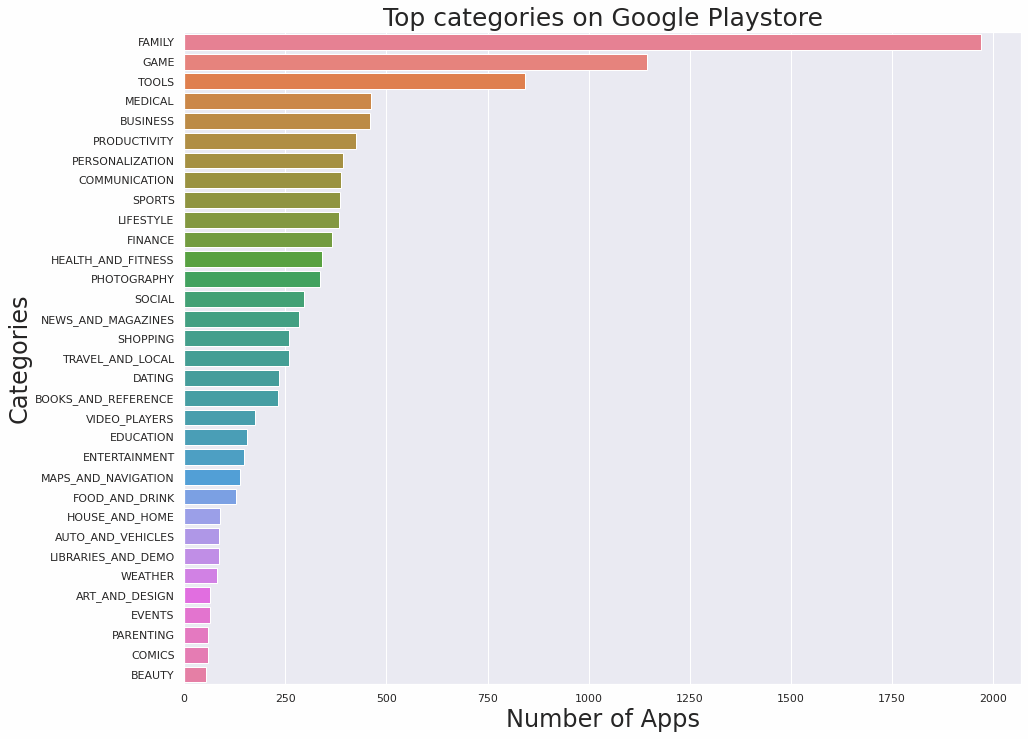

In [22]:
# 1.Number of apps in each category 
x = data['Category'].value_counts()
y = data['Category'].value_counts().index
# plt.xlabel(x,fontsize = 15)

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

graph = sns.barplot(x= x, y=y, palette = 'husl')
graph.set(xlabel = 'Number of Apps', ylabel = 'Categories')
graph.set_title("Top categories on Google Playstore", fontsize = 25)

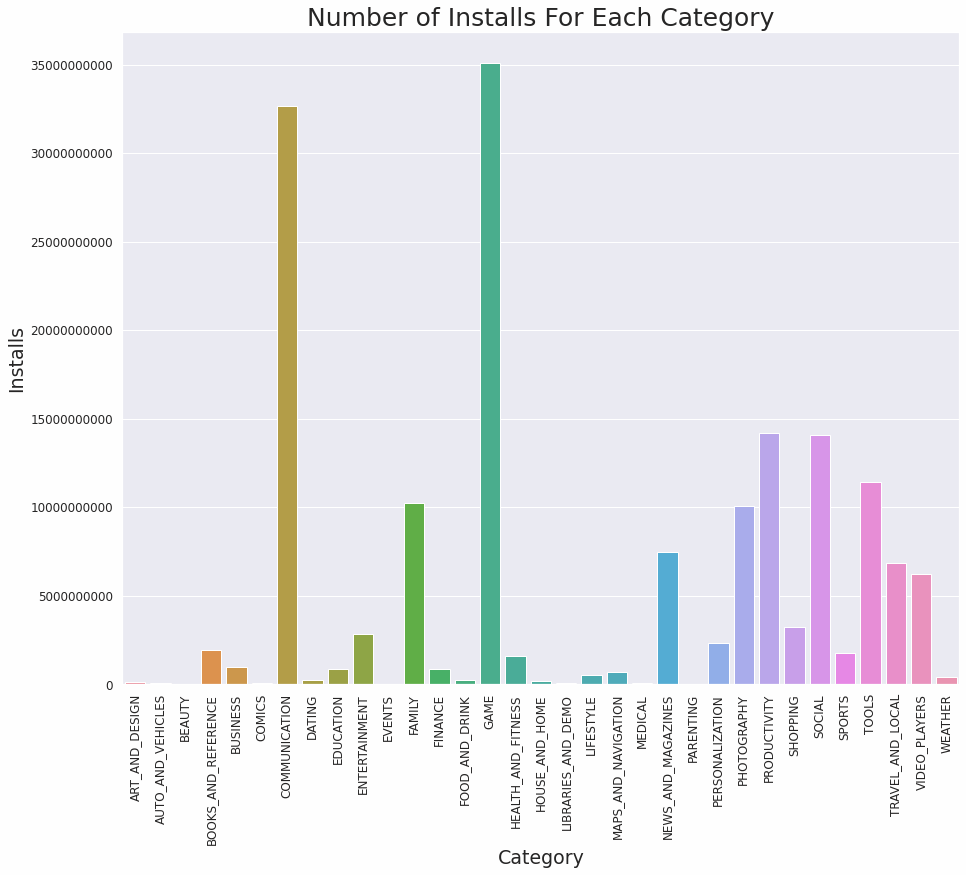

In [23]:
# 2. Find category that is used the most based on number of installs

categories = data.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  

# category_installs_sum_df['Category']
# category_installs_sum_df['Installs']

graph = sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)

graph.set_xlabel('Category', fontsize = 19)
graph.set_ylabel('Installs', fontsize = 19)

graph.tick_params(labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Installs For Each Category',fontsize = 25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


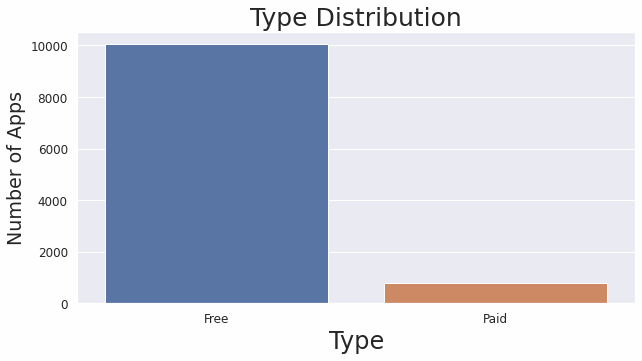

In [24]:
#4. paid vs free apps distribution

plt.figure(figsize=(10, 5))
sns.countplot(data['Type'])
plt.title('Type Distribution', fontsize = 25)
plt.ylabel('Type',fontsize = 19)
plt.ylabel('Number of Apps',fontsize = 19)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

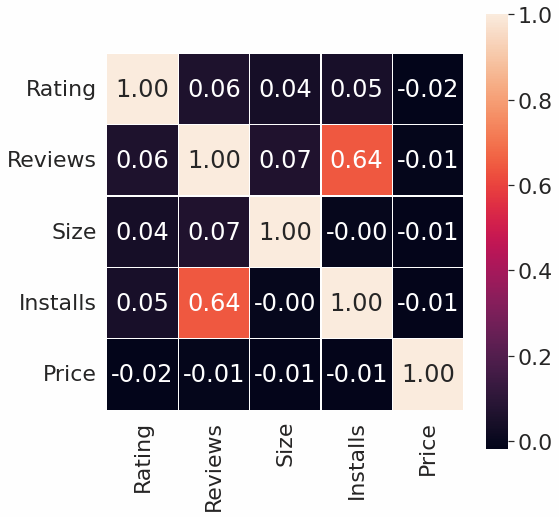

In [25]:
# 5.Correlation between no. of review, ratings, size, price and no. of installs
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

In [26]:
rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [27]:
rev.shape

(64295, 5)

In [28]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [29]:
rev.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [30]:
rev = rev.dropna()
rev.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [31]:
rev.shape

(37427, 5)

In [32]:
## Merge the two datasets based on App and keep only the required Columns
merged_df = rev.merge(data, on = "App")
merged_df.drop(['Rating','Reviews','Size','Installs', 'Type','Price','Content Rating',	'Genres','Last Updated','Current Ver','Android Ver'], axis = 1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS
...,...,...,...,...,...,...
72600,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE
72601,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE
72602,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE
72603,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE


In [33]:
rev.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37427.0,0.182171,0.351318,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37427.0,0.492770,0.259904,0.0,0.357143,0.514286,0.65,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


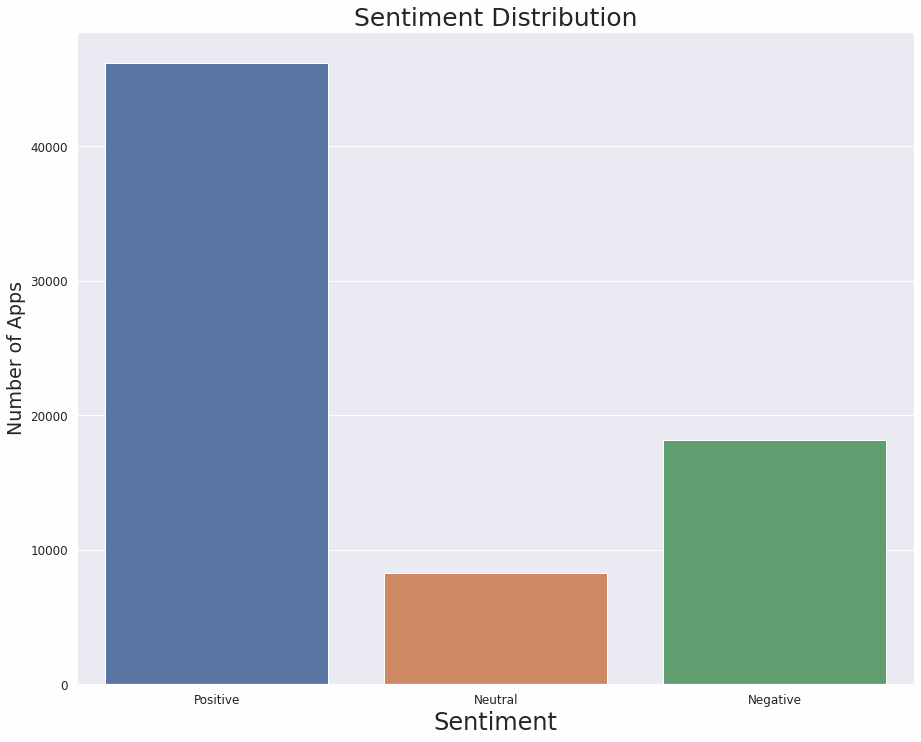

In [34]:
# After mapping both the datasets
# 6. Plot the Sentiments of apps

sns.countplot(merged_df['Sentiment'])

plt.title('Sentiment Distribution',fontsize = 25)
plt.ylabel('Sentiment',fontsize = 19)
plt.ylabel('Number of Apps',fontsize = 19)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [35]:
# Top 5 Highest Installed Apps
df = data.groupby(by =['App', 'Category'])[['Installs']].sum().reset_index()
df = df.sort_values(by = 'Installs',ascending=False).head()
df
# Highest Installed Category is Game

,App,Category,Installs
8150,Subway Surfers,GAME,6.000000e+09
4975,Google Photos,PHOTOGRAPHY,4.000000e+09
5160,Hangouts,COMMUNICATION,4.000000e+09
4962,Google Drive,PRODUCTIVITY,4.000000e+09
5444,Instagram,SOCIAL,4.000000e+09


In [36]:
# Top 5 Apps with Highest Reviews
df = data.groupby(by = ['App','Category'])[['Reviews']].sum().reset_index()
df = df.sort_values(by = 'Reviews',ascending=False).head()
df

# Game category also lies in most reviews

,App,Category,Reviews
5444,Instagram,SOCIAL,266241989.0
9122,WhatsApp Messenger,COMMUNICATION,207348304.0
6216,Messenger – Text and Video Chat for Free,COMMUNICATION,169932272.0
8150,Subway Surfers,GAME,166331958.0
4359,Facebook,SOCIAL,156286514.0


In [37]:
# Top 5 Apps with Lowest Reviews
df = data.groupby(by = ['App','Category'])[['Reviews']].sum().reset_index()
df = df.sort_values(by = 'Reviews',ascending=True).head()
df

,App,Category,Reviews
5999,MD PAWS AH,MEDICAL,0.0
1076,BH Connect,SOCIAL,0.0
1080,BH Mission Playbook,TRAVEL_AND_LOCAL,0.0
1081,BH Online,FINANCE,0.0
4248,FK Jelgava,SPORTS,0.0


In [38]:
# top 5 expensive Apps 
df = data.groupby(by =['App', 'Category']) [['Price']].sum().reset_index()
# we get the sum of price of every uique app but lets sort them Descending by price
df = df.sort_values(by = 'Price', ascending=False).head() 
df

,App,Category,Price
5371,I'm Rich - Trump Edition,LIFESTYLE,400.00
9623,most expensive app (H),FAMILY,399.99
5372,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,399.99
5346,I Am Rich Pro,FAMILY,399.99
9739,💎 I'm rich,LIFESTYLE,399.99


Text(0.5, 1.0, 'Distribution of Rating')

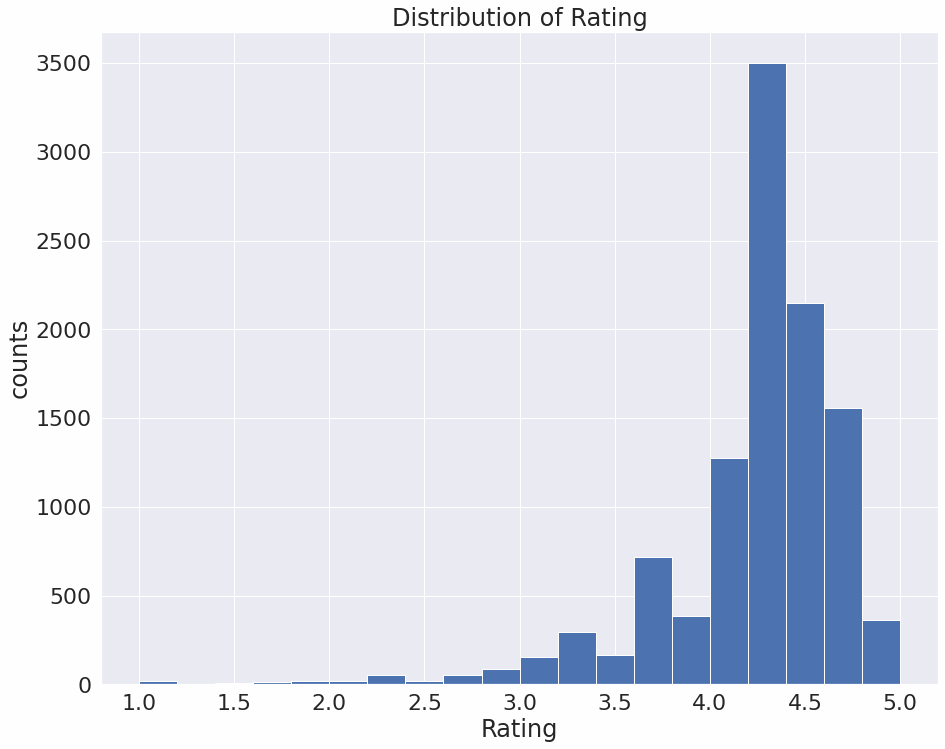

In [39]:
# Describing Rating dataframe
plt.hist((data['Rating']), bins = 20)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.title('Distribution of Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


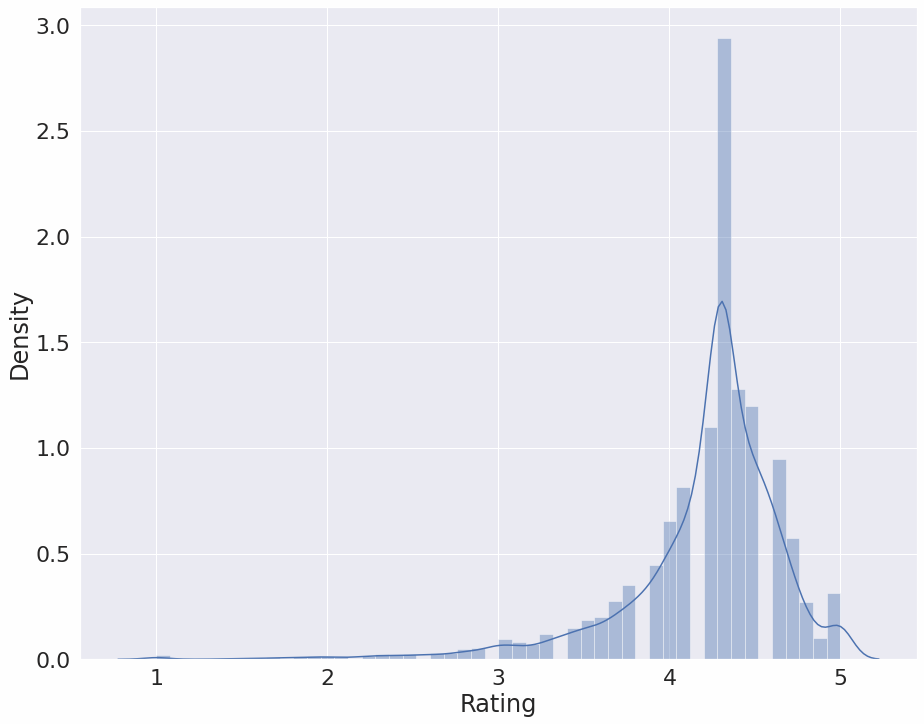

In [40]:
sns.distplot(data['Rating']);

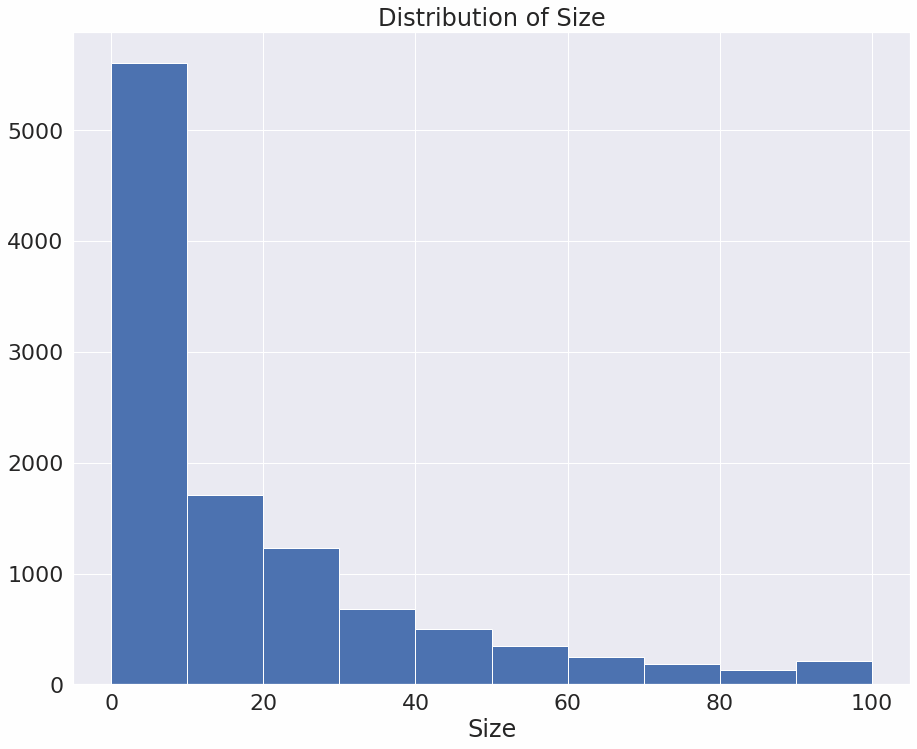

In [42]:
#Distribution of Size of apps
plt.hist(data['Size']);
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.show()

In [43]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

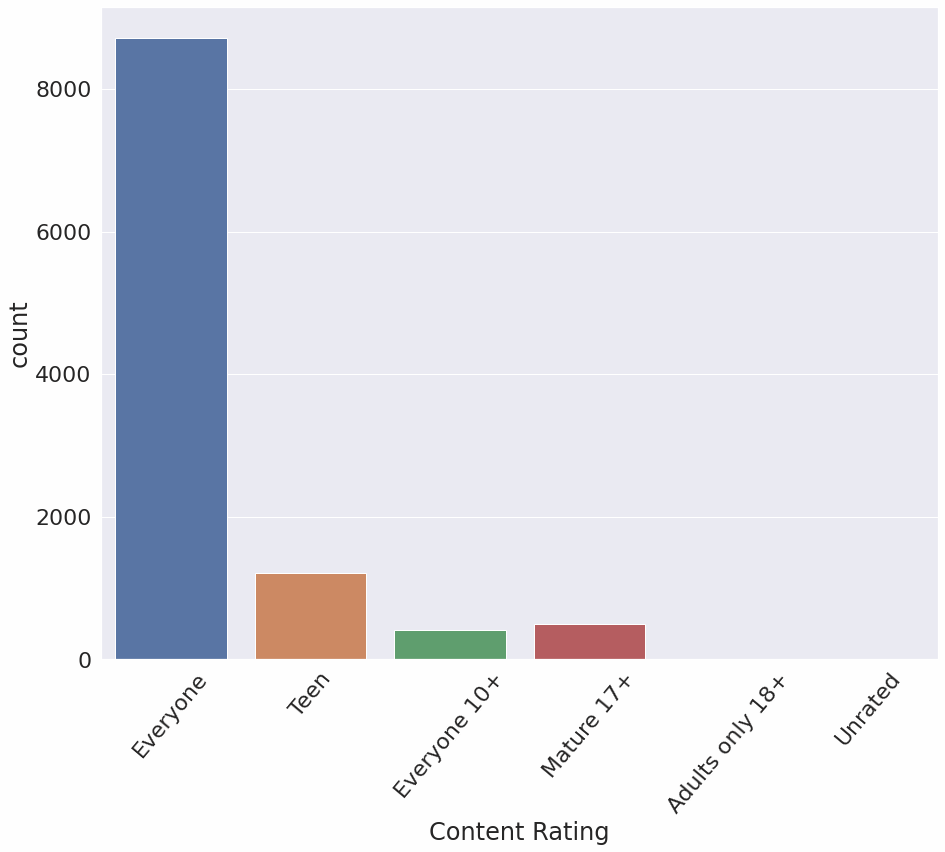

In [45]:
#Distribution of app avalibility with age requirements
sns.countplot(data['Content Rating'])
plt.xticks(rotation=50)

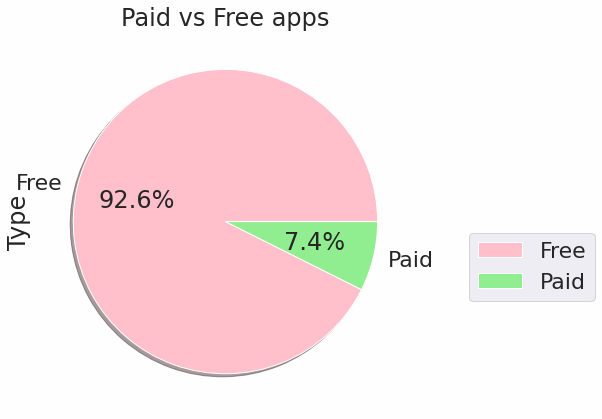

In [50]:
plt.subplot(1,2,1)
pie = data['Type'].value_counts(sort=True);
colors = ["pink","lightgreen"]
#explode = (0.2,0)
pie.plot(kind = 'pie', autopct='%1.1f%%', legend = True, colors = colors, shadow = True);
plt.title('Paid vs Free apps')
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

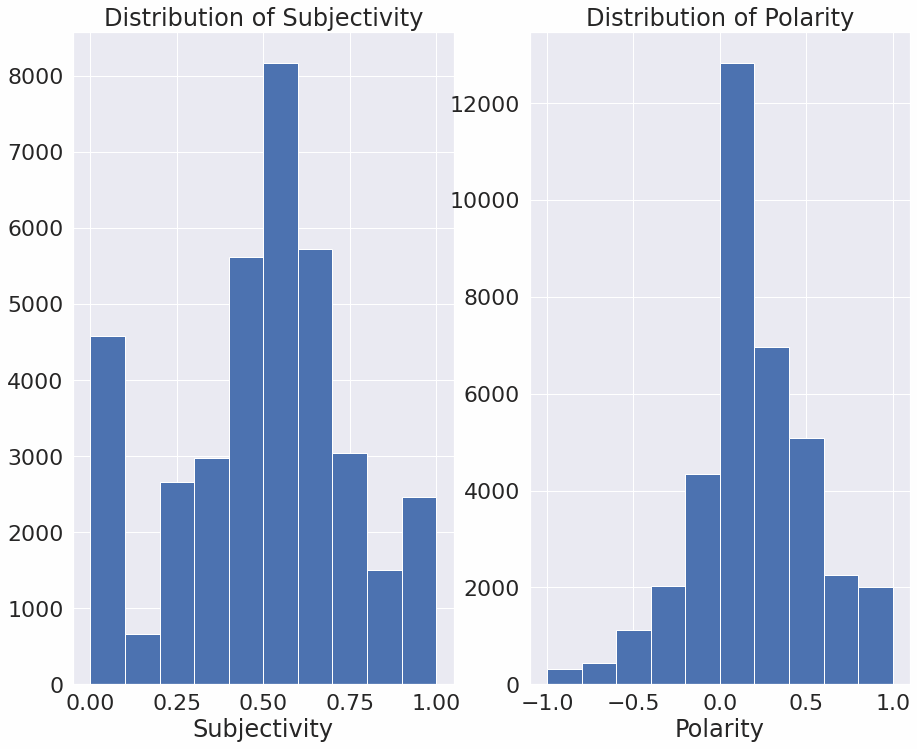

In [51]:
#Distribution of Subjectivity and Polarity
plt.subplot(1,2,1)
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(rev['Sentiment_Subjectivity'])
plt.subplot(1,2,2)
plt.xlabel("Polarity")
plt.title("Distribution of Polarity")
plt.hist(rev['Sentiment_Polarity'])
plt.show();

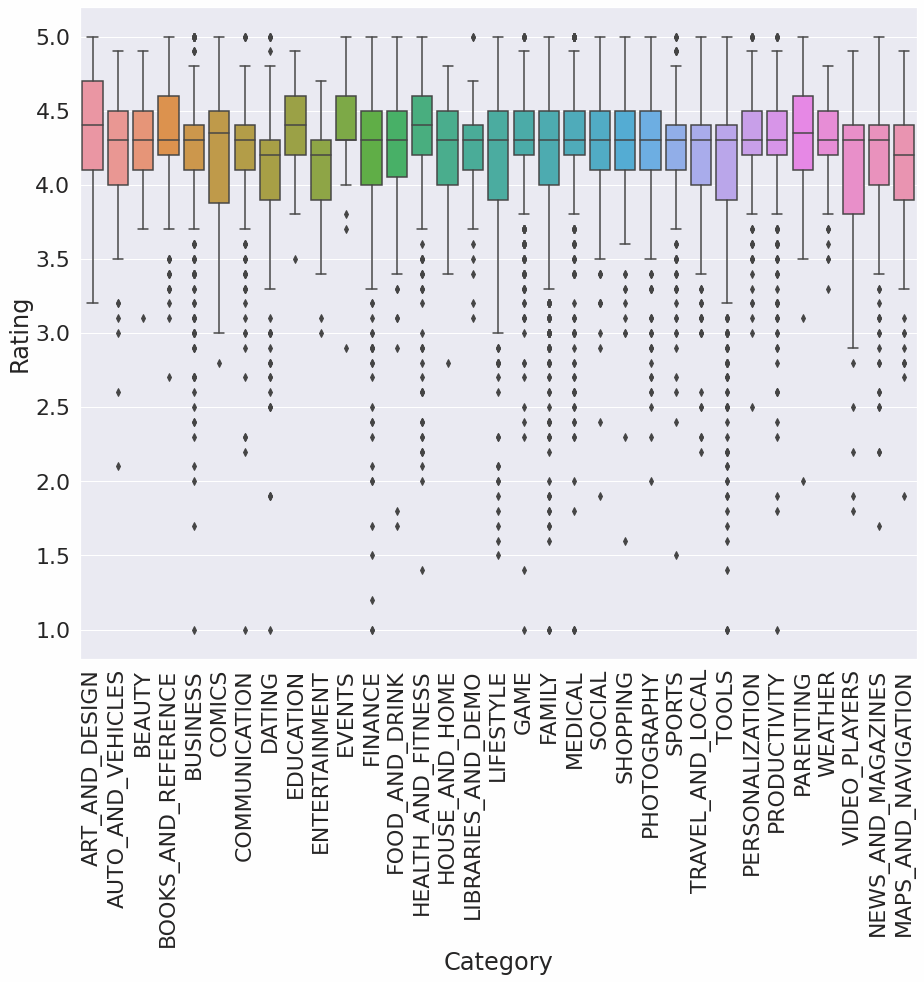

In [55]:
rating_box = pd.concat([data['Rating'], data['Category']],axis = 1)

sns.boxplot(x = 'Category',y = 'Rating', data = rating_box)
plt.xticks(rotation=90);